# Градиентный спуск (20 баллов)

## Основная часть (10 баллов)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

np.random.seed(1234)

__Задача 1.__ Рассмотрим квадратичную задачу оптимизации:

$$ \min_{x \in \mathbb{R}^d} \left[f(x) := \frac{1}{2} x^\top A x - b^\top x\right], $$

где $A \in \mathbb{R}^{d \times d}$ такая, что $A$ — положительно определенная матрица, $b \in \mathbb{R}^d$.

__а) (2 балла)__ Докажите, что для константы сильной выпуклости верно $\mu \leq \frac{1}{2} \lambda_{\min} \left( A + A^\top \right)$, где $\lambda_{\min}(A)$ — минимальное собственное значение матрицы $A$.

Найдем градиент $f(x)$:

$f : \mathbb{R}^d \to \mathbb{R}$

$D(f(x))[h] = \langle \nabla f, h \rangle$.

$D(f(x))[h] = \frac{1}{2} D(x^\top A x)[h] - D(b^\top x)[h] = \frac{1}{2}D(\langle x, Ax \rangle)[h] - D(\langle b, x \rangle)[h] = \frac{1}{2} (\langle D(x)[h], Ax \rangle + \langle x, D(Ax)[h] \rangle) - \langle b, h \rangle = \frac{1}{2}( \langle h, Ax \rangle + \langle x, Ah \rangle) - \langle b, h \rangle = \langle \frac{1}{2} Ax - b, h \rangle +\underbrace{\frac{1}{2} h^TA^Tx}_{\frac{1}{2} \langle A^Tx, h \rangle} = \langle \frac{A + A^T}{2}x - b, h \rangle$

 Следовательно, $\nabla f(x) = \frac{A + A^T}{2}x - b$.

Гессиан $\nabla^2 f(x) = \frac{A + A^T}{2}$.

$\nabla^2 f(x) : \mathbb{R^{d \times d}} \to \mathbb{R}$.

$\tilde{A}$

Применим теорему о Критерии $\mu$-сильно выпуклости второго порядка: $\nabla^2 f(x)  \succeq \mu I_d $. То есть $\frac{A + A^T}{2} \succeq \mu I_d$, что эквивалентно $\mu \leq \frac{1}{2} \lambda_{\min} \left( A + A^\top \right)$.



__б) (1 балла)__ Докажите, что для константы Липшица верно $L \geq \frac{1}{2}\lambda_{\max}\left(A + A^\top \right)$, где $\lambda_{\max}(A)$ — максимальное собственное значние матрицы $A$.

Рассмотрим $L$-гладкую собственную дважды непрерывно дифференцируемую функцию $f : \mathbb{R}^d \to \mathbb{R}$. Запишем для неё $L$-гладкость:
$
\|\nabla f(x) - \nabla f(y)\|_2 \leq L \|x - y\|_2 \implies
\frac{\|\nabla f(x) - \nabla f(y)\|_2}{\|x - y\|_2} \leq L.
$

При $y \to x$ получаем:
$
\|\nabla^2 f(x)\|_2 \leq L, \quad \text{то есть} \quad \max_i |\lambda_i(\nabla^2 f(x))| \leq L.
$ Что нам и требовалось показать.

Для упрощения задачи, _в последующих пунктах_ мы будем рассматривать только __симметричные__ матрицы $A$. Так как матрица $A$ симметрична, то $A + A^\top = 2A$. Тогда выполнено следующее равенство для соответствующих собственных чисел:
$$
\frac{1}{2} \lambda \left( A + A^\top \right) = \lambda (A).
$$

__в) (1.5 балла)__ Реализуйте функцию генерации квадратичной задачи по заданной размерности $d$ и константам сильной выпуклости $\mu$ и гладкости $L$. Для создания матрицы $A$ учтите, что ортогональные преобразования не изменяют собственные значения матрицы.

In [2]:
def generate_quadratic_problem(d, mu, L):
    """
    Генерирует квадратичную оптимизационную задачу:
    min_x f(x) = 0.5 * x^\top A x — b^\top x

    Параметры:
        d (int): Размерность задачи.
        mu (float): Константа сильной выпуклости (mu > 0).
        L (float): Константа гладкости (L > mu).

    Возвращает:
        A (np.array): Симметричная положительно определенная матрица размерности d x d.
        b (np.array): Вектор размерности d.
    """

    if mu <= 0 or L <= mu:
        raise ValueError("Условия mu > 0 и L > mu должны выполняться.")

    unitary_matrix, _ = np.linalg.qr(np.random.randn(d, d))
    diag_matrix = np.diag(np.linspace(mu + 1e-6, L - 1e-6, d))

    A = unitary_matrix @ diag_matrix @ unitary_matrix.T

    A = (A + A.T) / 2

    b = np.random.randn(d)

    return A, b

In [3]:
# Выполним проверку сгенерированной задачи при заданных параметрах
d = 50
mu = 1.0
L = 10.0

A, b = generate_quadratic_problem(d, mu, L)

# Проверка, что A симметрична
assert np.allclose(A, A.T), "Матрица A не симметрична."

# Проверка собственных значений A
eigenvalues_A = np.linalg.eigvalsh(A)
assert np.min(eigenvalues_A) >= mu, "Минимальное собственное значение A меньше mu."
assert np.max(eigenvalues_A) <= L, "Максимальное собственное значение A больше L."

__г) (0.5 балл)__ Докажите, что аналитическое решение квадратичной задачи имеет следующий вид:

$$ x^* = \left(\frac{A + A^\top}{2}\right)^{-1}b.$$

У нас $f$ - непрерывно дифференцируема на $\mathbb{R^d}$ и $\mathbb{R^d}$ - выпуклое множество. Следовательно, можем применить теорему и приравнять градиент к 0. К тому же, матрица $A$ положительно определена, а значит - обратима.

$\nabla f(x) = \frac{A + A^T}{2}x - b$.

$\nabla f(x) = 0 \implies \frac{A + A^T}{2}x - b = 0 \implies \frac{A + A^T}{2}x = b \implies x = \left(\frac{A + A^\top}{2}\right)^{-1}b$.

Напишите код для вычисления $x^*$.

In [4]:
def generate_x_star(A, b):
  """
  Вычисляет x_star для квадратичной задачи f(x) = 0.5 * x^T A x — b^T x.

  Параметры:
      A (np.array): Матрица квадратичной задачи.
      b (np.array): Вектор линейной части.
  Возвращает:
      (np.array): Решение квадратичной задачи.

  """

  return np.linalg.inv(A) @ b

__Задача 2.__ В данной задаче мы рассмотрим поиск решения квадратичной задачи с помощью градиентного спуска.

__а) (0.5 балла)__ Реализуйте функцию подсчета градиента в заданной точке $x$ для функции $f(x)$.

$\nabla f(x) = \frac{A + A^T}{2}x - b$.

In [5]:
def grad(x, A, b):
    """
    Вычисляет градиент квадратичной функции f(x) = 0.5 * x^T A x — b^T x.

    Параметры:
        x (np.array): Точка, в которой вычисляется градиент.
        A (np.array): Матрица квадратичной задачи.
        b (np.array): Вектор линейной части.

    Возвращает:
        grad (np.array): Градиент функции в точке x.
    """

    # YOUR CODE HERE

    return A @ x - b

__б) (0.5 балла)__ Для оценки сходимости мы будем использовать следующий критерий: $\| x - x^* \|_2$. Реализуйте функцию для подсчета данного критерия.

In [6]:
def criterion(x, x_star):
    """
    Вычисляет аргументный критерий сходимости: ||x - x*||_2.

    Параметры:
        x (np.array): Текущая точка.
        x_star (np.array): Точное решение.

    Возвращает:
        norm (float): Значение критерия.
    """

    # YOUR CODE HERE

    return np.linalg.norm(x - x_star)

__в) (4 балла)__  Реализуйте метод градиетного спуска.

**Псевдокод алгоритма**

_Инициализация:_

- Размер шага $\{ \gamma_k \}_{k=0} > 0$.
- Начальная точка $x^0 \in \mathbb{R}^d$.
- Максимальное число итераций $K$.

---

$k$_-ая итерация:_

$$x^{k+1} = x^k - \gamma_k \nabla f \left(x^k\right).$$

---

**Условие остановки:**
- Достигнуто максимальное число итераций $K$ или $\| x^k - x^* \|_2 < \varepsilon$.

**Выход:**
- Полученное значение $x^K$.

In [7]:
def gradient_descent(A, b, grad, criterion, x_0, x_star, epsilon=1e-6, max_iter=1000, **params):
    """
    Реализация градиентного спуска для квадратичной задачи.

    Параметры:
        A (np.array): Матрица квадратичной формы.
        b (np.array): Вектор линейной части.
        grad (Callable): Функция для вычисления градиента.
        criterion (Callable): Функция для вычисления критерия сходимости.
        x_0 (np.array): Начальная точка.
        x_star (np.array): Точное решение.
        epsilon (float): Точность сходимости (по умолчанию 1e-6).
        max_iter (int): Максимальное число итераций (по умолчанию 1000).
        **params: Именованные гиперпараметры метода
                  params['gamma'](k) - значение шага на итерации k (возможно, зависящее от аргумента).

    Возвращает:
        x (np.array): Найденное решение.
        errors (list): Список значений критерия сходимости на каждой итерации.
    """
    x = x_0.copy()
    errors = [criterion(x, x_star)]

    for k in range(max_iter):

        x = x - params['gamma'](k) * grad(x, A, b)

        error = criterion(x, x_star)
        errors.append(error)

        if error < epsilon:
            break

    return x, errors

Запустите градиентный спуск на $K = 10^3$ итераций с шагом $\gamma_k = \frac{1}{L}$ и начальной точкой $x^0 = 0$. Постройте сравнительный график зависимости точности метода $\|x^k - x^*\|_2$ и теоретической оценки от числа итераций.

Напишем функции для подсчета константы $L$ и $\mu$. Мы знаем оценки на эти константы, возьмем в точности равенство.


In [8]:
def get_minmax_eigenvalues(A):
  eigenvalues, _ = np.linalg.eig(A)

  return np.min(eigenvalues), np.max(eigenvalues)

In [9]:
mu, L = get_minmax_eigenvalues(A)

In [10]:
x_target, errors = gradient_descent(A, b, grad, criterion,
                                    x_0=np.zeros(d),
                                    x_star=generate_x_star(A, b),
                                    max_iter=1000, gamma=lambda k: 1 / L)

Построим графики


<>:16: SyntaxWarning: invalid escape sequence '\g'
<>:16: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-508523612.py:16: SyntaxWarning: invalid escape sequence '\g'
  plt.title('Сравнение фактической ошибки и теоретической оценки\nГрадиентный спуск с шагом $\gamma_k = 1/L$', fontsize=14)


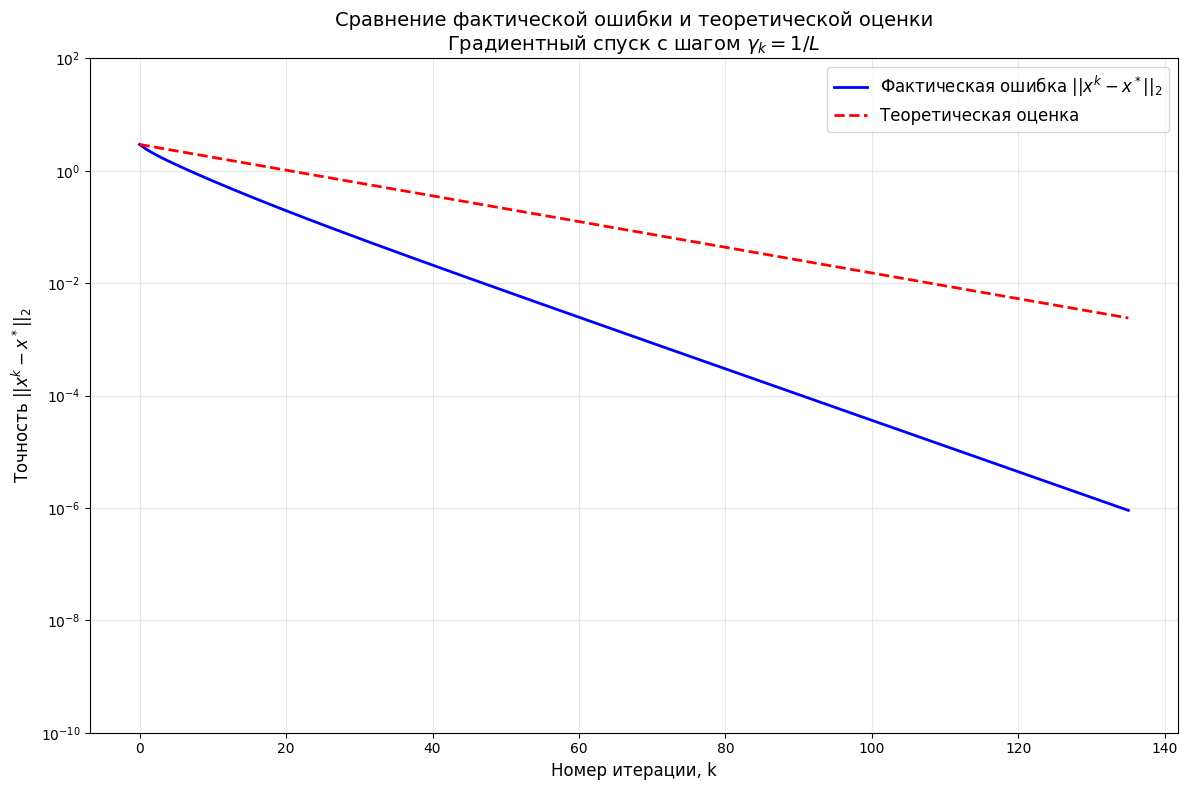

In [11]:
def theoretical_bound(k, L, mu, initial_error):
    return initial_error * np.sqrt((1 - mu / L)**k)

initial_error = errors[0]

iterations = range(len(errors))
theoretical_errors = [theoretical_bound(k, L, mu, initial_error) for k in iterations]

plt.figure(figsize=(12, 8))

plt.semilogy(iterations, errors, 'b-', linewidth=2, label='Фактическая ошибка $||x^k - x^*||_2$')
plt.semilogy(iterations, theoretical_errors, 'r--', linewidth=2, label='Теоретическая оценка')

plt.xlabel('Номер итерации, k', fontsize=12)
plt.ylabel('Точность $||x^k - x^*||_2$', fontsize=12)
plt.title('Сравнение фактической ошибки и теоретической оценки\nГрадиентный спуск с шагом $\gamma_k = 1/L$', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(1e-10, 1e2)
plt.tight_layout()
plt.show()


## Дополнительная часть (10 баллов)

__Задача 3.__ Рассмотрим различные значения $\gamma_k$ и их влияние на сходимость градиентного спуска.

__а) (1 балл)__ Рассмотрите следующие значения шага:

1. $\gamma_k = \frac{1}{2L}$;

2. $\gamma_k = \frac{1}{L}$;

3. $\gamma_k = \frac{2}{L}$;

4. $\gamma_k = \frac{3}{L}$;

5. $\gamma_k = \frac{2}{\mu + L}$.

Проверьте, при каких значениях алгоритм сходится к решению. Нанесите на график те запуски, при которых наблюдается сходимость (теоретическую сходимость можно убрать).

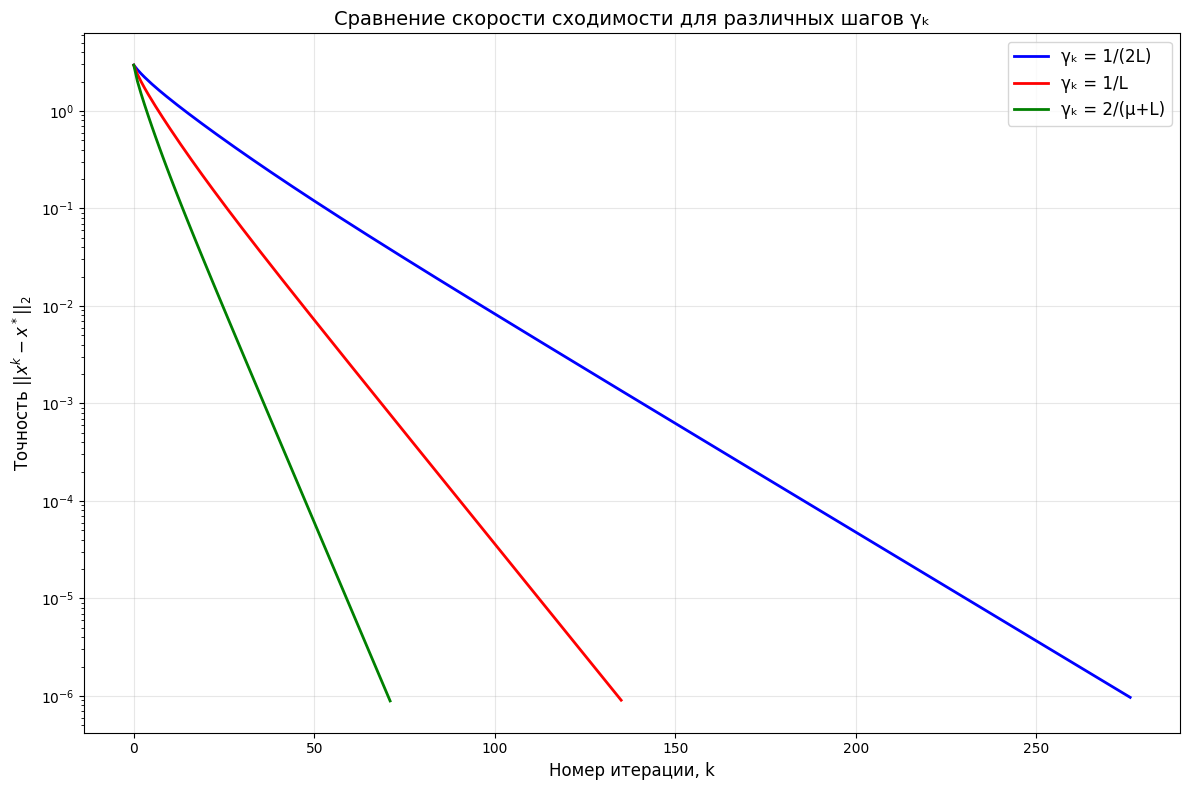

In [12]:
step_functions = {
    '1/(2L)': lambda k, L, mu: 1/(2*L),
    '1/L': lambda k, L, mu: 1/L,
    '2/(μ+L)': lambda k, L, mu: 2/(mu + L)
}

mu = np.min(np.linalg.eigvals(A))

plt.figure(figsize=(12, 8))

colors = ['blue', 'red', 'green']

step_functions_errors = []

for i, (label, gamma_func) in enumerate(step_functions.items()):
    gamma_lambda = lambda k: gamma_func(k, L, mu)

    x_target, errors = gradient_descent(A, b, grad, criterion,
                                      x_0=np.zeros(d),
                                      x_star=generate_x_star(A, b),
                                      max_iter=1000,
                                      gamma=gamma_lambda)

    step_functions_errors.append([errors, label])

    iterations = range(len(errors))
    plt.semilogy(iterations, errors, color=colors[i], linewidth=2,
                label=f'γₖ = {label}')

plt.xlabel('Номер итерации, k', fontsize=12)
plt.ylabel('Точность $||x^k - x^*||_2$', fontsize=12)
plt.title('Сравнение скорости сходимости для различных шагов γₖ', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

На каком шаге получен наибыстрейший результат? Как думаете почему?

Можно рассмотреть оценку сходимости метода к $K$-й итерации и получится, что $$1 - \frac{4\mu L}{(\mu + L)^{2}} < 1 - \frac{\mu}{L}$$

и получается, что самое оптимальное будет $\gamma_k = \frac{2}{\mu + L}$

__б) (2.5 балла)__ Рассмотрим значение шага $\gamma_k = \arg\min\limits_{\gamma} f \left(x_k - \gamma \nabla f \left(x^k\right) \right)$. Такая модификация называется методом наискорейшего спуска. Докажите, что
$$
\gamma_k  = \frac{\langle \nabla f(x), \nabla f(x) \rangle}{\langle A \nabla f(x), \nabla f(x) \rangle} .
$$

Переформулируем: введем функцию $g(\gamma) = f(x_k - \gamma \nabla f(x^k))$ и функцию $g(\gamma)$ необходимо минимизировать. Перепишем $f(x)$ в виде скалярного произведения:
$$f(x) = \frac{1}{2} x^\top A x - b^\top x = \frac{1}{2} \langle Ax, x\rangle - \langle x,b \rangle
$$

Распишем $f(x_k - \gamma \nabla f(x^k))$

$f(x_k - \gamma \nabla f(x^k)) = \frac{1}{2} \langle A(x_k - \gamma \nabla f(x^k)), x_k - \gamma \nabla f(x^k)\rangle - \langle x_k - \gamma \nabla f(x^k),b \rangle = \frac{1}{2}( \langle Ax_k, x_k \rangle - 2\gamma \langle Ax_k, \nabla f(x_k)\rangle + \gamma^2 \langle A\nabla f(x^k), \nabla f(x^k)\rangle ) - \langle x^k, b\rangle + \gamma \langle \nabla f(x^k), b \rangle = \underbrace{\frac{1}{2} \langle Ax^k, x^k \rangle - \langle x^k, b\rangle}_{f(x^k)} + \frac{\gamma^2}{2} \langle A\nabla f(x^k), \nabla f(x^k)\rangle - \underbrace{ (\gamma \langle Ax_k, \nabla f(x_k)\rangle - \langle b, \nabla f(x^k) \rangle)}_{\gamma \langle Ax^k - b, \nabla f(x^k) \rangle = \gamma \langle \nabla f(x^k),\nabla f(x^k)\rangle} = f(x^k) - \gamma \langle \nabla f(x^k),\nabla f(x^k)\rangle + \frac{\gamma^2}{2} \langle A\nabla f(x^k), \nabla f(x^k)\rangle$


$g(\gamma)$ - квадратичная функция, следовательно, у нее есть минимум. Найдем производную $g(\gamma)$, приравняем её к 0.

$g^{\prime}(\gamma) = \gamma \langle A\nabla f(x^k), \nabla f(x^k)\rangle - \langle \nabla f(x^k),\nabla f(x^k)\rangle$.

$g^{\prime}(\gamma) = 0 \implies$ $$\gamma_k = \frac{\langle \nabla f(x^k), \nabla f(x^k) \rangle}{\langle A \nabla f(x^k), \nabla f(x^k) \rangle}$$

__в) (2.5 балла)__ Реализуйте метод наискорейшего градиентного спуска. Для удобства предлагается немного изменить функцию градиентного спуска.

In [13]:
def fastest_gradient_descent(A, b, grad, criterion, x_0, x_star, epsilon=1e-6, max_iter=1000, **params):
    """
    Реализация наискорейшего градиентного спуска для квадратичной задачи.

    Параметры:
        A (np.array): Матрица квадратичной формы.
        b (np.array): Вектор линейной части.
        grad (Callable): Функция для вычисления градиента.
        criterion (Callable): Функция для вычисления критерия сходимости.
        x_0 (np.array): Начальная точка.
        x_star (np.array): Точное решение.
        epsilon (float): Точность сходимости (по умолчанию 1e-6).
        max_iter (int): Максимальное число итераций (по умолчанию 1000).
        **params: Именованные гиперпараметры метода
                params['gamma'](A, b, grad, x, x_star) — значение шага на итерации k.

    Возвращает:
        x (np.array): Найденное решение.
        errors (list): Список значений критерия сходимости на каждой итерации.
    """
    x = x_0.copy()
    errors = [criterion(x, x_star)]

    for k in range(max_iter):

        x = x - grad(x, A, b) * params['gamma'](A, b, grad, x, x_star)

        error = criterion(x, x_star)
        errors.append(error)

        if error < epsilon:
            break

    return x, errors

In [14]:
def gamma_fastest(A, b, grad, x, x_star):
    """
    Вычисляет шаг gamma_k = argmin f(x^k — gamma * ∇f(x_k))

    Параметры:
        A (np.array): Матрица квадратичной формы.
        b (np.array): Вектор линейной части.
        grad (Callable): Функция для вычисления градиента.
        x (np.array): Точка.
        x_star (np.array): Точное решение.

    Возвращает:
        gamma (float): Найденное решение.
    """

    g = grad(x, A, b)
    numerator = np.dot(g, g)
    denominator = np.dot(A @ g, g)

    return numerator / denominator

Запустите метод и сравните его с лучшим результатом полученными для постоянного шага.

In [15]:
x_gamma_fastest, errors_gamma_fastest = fastest_gradient_descent(A, b, grad, criterion,
                                                                 x_0=np.zeros(d),
                                                                 x_star=generate_x_star(A, b),
                                                                 epsilon=1e-06, max_iter=1000, gamma=gamma_fastest)

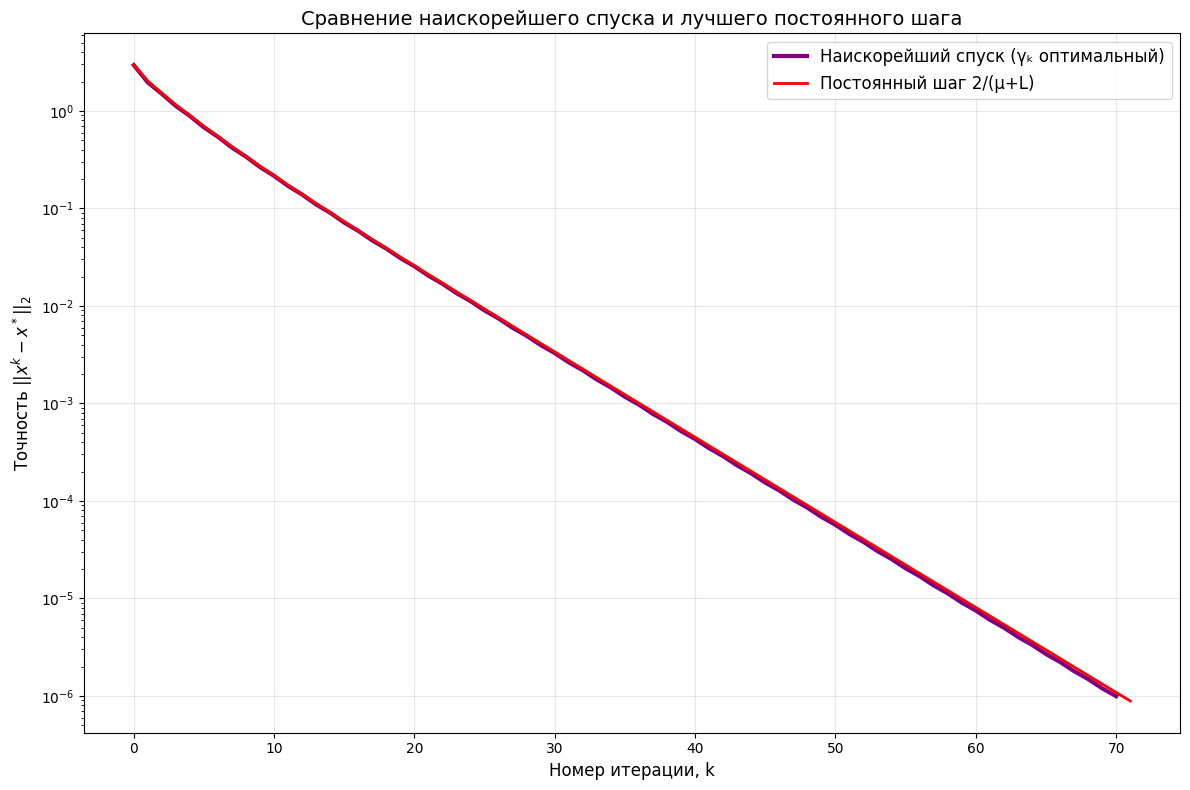

In [16]:
plt.figure(figsize=(12, 8))

iterations_fastest = range(len(errors_gamma_fastest))
plt.semilogy(iterations_fastest, errors_gamma_fastest, color='purple', linewidth=3,
            label='Наискорейший спуск (γₖ оптимальный)')

errors_best_constant = step_functions_errors[2][0]
iterations_constant = range(len(errors_best_constant))
plt.semilogy(iterations_constant, errors_best_constant, color='red', linewidth=2,
            label=f'Постоянный шаг {step_functions_errors[2][1]}')

plt.xlabel('Номер итерации, k', fontsize=12)
plt.ylabel('Точность $||x^k - x^*||_2$', fontsize=12)
plt.title('Сравнение наискорейшего спуска и лучшего постоянного шага', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

__г) (2 балла)__ И последним способом подбора шага станет шаг Поляка—Шора: $\gamma_k = \frac{f \left(x^k\right) - f^*}{\alpha \|\nabla f\left(x^k\right)\|^2_2}$, где $\alpha$ нужно подобрать отдельно.

In [17]:
def schor_gradient_descent(A, b, grad, criterion, x_0, x_star, epsilon=1e-6, max_iter=1000, **params):
    """
    Реализация градиентного спуска с шагом Поляка—Шора для квадратичной задачи.

    Параметры:
        A (np.array): Матрица квадратичной формы.
        b (np.array): Вектор линейной части.
        grad (Callable): Функция для вычисления градиента.
        criterion (Callable): Функция для вычисления критерия сходимости.
        x_0 (np.array): Начальная точка.
        x_star (np.array): Точное решение.
        epsilon (float): Точность сходимости (по умолчанию 1e-6).
        max_iter (int): Максимальное число итераций (по умолчанию 1000).
        **params: Именованные гиперпараметры метода
            params['gamma'](A, b, grad, x, x_star, alpha) — значение шага на итерации k.
            params['alpha'] — параметр шага Поляка—Шора.

    Возвращает:
        x (np.array): Найденное решение.
        errors (list): Список значений критерия сходимости на каждой итерации.
    """
    x = x_0.copy()
    errors = [criterion(x, x_star)]

    alpha = params['alpha']

    for k in range(max_iter):

        x = x - grad(x, A, b) * params['gamma'](A, b, grad, x,x_star , alpha)

        error = criterion(x, x_star)
        errors.append(error)

        if error < epsilon:
            break

    return x, errors

In [18]:
def f(x, A, b):
  """
  Вычисляет значение функции квадратичной задачи в точке x
  """
  return np.dot(A @ x, x) / 2 - np.dot(b, x)


def gamma_schor(A, b, grad, x, x_star, alpha):
    """
    Вычисляет шаг gamma_k = (f(x^k) - f(x*))/(a||∇f(x_k)||)

    Параметры:
        A (np.array): Матрица квадратичной формы.
        b (np.array): Вектор линейной части.
        grad (Callable): Функция для вычисления градиента.
        x (np.array): Точка.
        x_star (np.array): Точное решение.
        gamma (float): Параметр шага Поляка—Шора.

    Возвращает:
        gamma (float): Найденное решение.
    """

    numerator = f(x, A, b) - f(x_star, A, b)
    grad_f = grad(x, A, b)
    denominator = alpha * np.dot(grad_f, grad_f)

    return numerator / denominator

Рассмотрите следующие значения для $\alpha$: 0.8, 1.0, 1.2, 1.5 и 2.0. Постройте сравнительные графики, найдите значение $\alpha$, при котором достигается наилучшая сходимость.

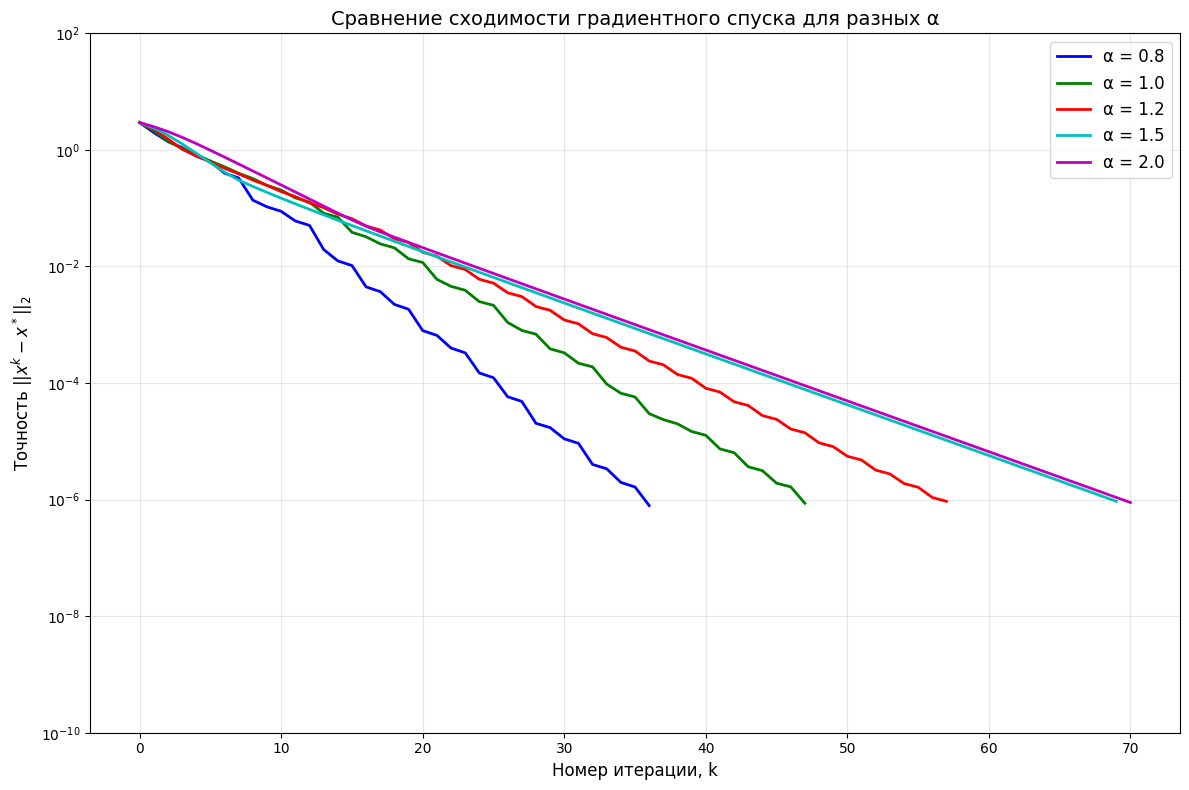

In [19]:
errors_dict = {}

alphas = [0.8, 1.0, 1.2, 1.5, 2.0]

for alpha in alphas:
    x_target, errors = schor_gradient_descent(
        A, b, grad, criterion,
        x_0=np.zeros(d),
        x_star=generate_x_star(A, b),
        max_iter=1000,
        gamma=gamma_schor,
        alpha=alpha
    )
    errors_dict[alpha] = errors

colors = ['b', 'g', 'r', 'c', 'm']
plt.figure(figsize=(12, 8))
for i, alpha in enumerate(alphas):
    errors = errors_dict[alpha]
    ran = range(len(errors))
    plt.semilogy(ran, errors, color=colors[i], linewidth=2, label=f'α = {alpha}')

plt.xlabel('Номер итерации, k', fontsize=12)
plt.ylabel('Точность $||x^k - x^*||_2$', fontsize=12)
plt.title('Сравнение сходимости градиентного спуска для разных α', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(1e-10, 1e2)
plt.tight_layout()
plt.show()




__д) (2 балла)__ Финал — постройте итоговый сравнительный график, на котором должны быть лучшие представители для

1. Постоянного шага;

2. Шага наискорейшего спуска;

3. Шага Поляка—Шора.

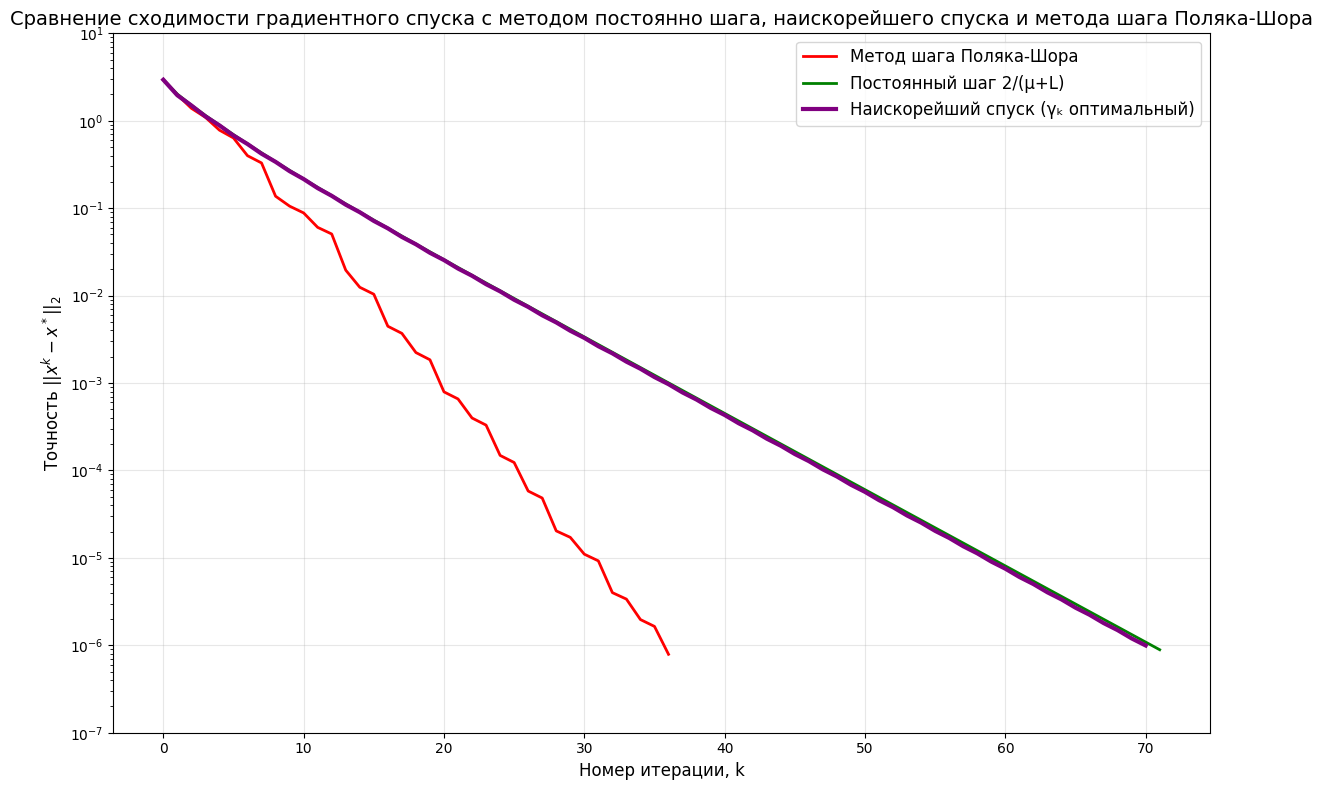

In [22]:
plt.figure(figsize=(12, 8))
plt.semilogy(range(len(errors_dict[0.8])), errors_dict[0.8], color='r', linewidth=2, label=f'Метод шага Поляка-Шора')
plt.semilogy(iterations_constant, errors_best_constant, color='g', linewidth=2,
            label=f'Постоянный шаг {step_functions_errors[2][1]}')
plt.semilogy(iterations_fastest, errors_gamma_fastest, color='purple', linewidth=3,
            label='Наискорейший спуск (γₖ оптимальный)')
plt.semilogy()
plt.xlabel('Номер итерации, k', fontsize=12)
plt.ylabel('Точность $||x^k - x^*||_2$', fontsize=12)
plt.title('Сравнение сходимости градиентного спуска c методом постоянно шага, наискорейшего спуска и метода шага Поляка-Шора', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(1e-7, 1e1)
plt.tight_layout()
plt.show()

Объясните полученные результаты.

Метод Поляка-Шора более оптимален, т.к. по сравнению с обычным градиентным спуском в $\gamma_k$ участвует не только градиент, но и значение функции $f(x_k)$